In [1]:
import pickle
import os
import numpy as np
import pandas as pd

In [2]:
model_paths = {
    'mae':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-01-13_UPEU_dcd_mae_fold/s_2',
    'mle':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-01-13_UPEU_dcd_mle_fold/s_2',
    'maew':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-01-13_UPEU_dcd_maew_fold/s_2',
   # 'mae_seg_loss':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-01-17_SJWC_additional_mae_loss/s_2/'
}
model_paths = {
   'gmm':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-01-13_QXFB_kernel_GMM_fold/s_2',
   'spiral':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-01-13_QXFB_kernel_spiral_fold/s_2',
}

model_paths = {
   'baseline':'/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/23-02-09_MYCZ_baseline/s_2/',
   'mask_augmentation':'/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/23-02-09_MYCZ_mask_augmentation/s_2/',
   'smooth_labels':'/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/23-02-09_MYCZ_smooth_labels/s_2/',
   'no_finetuning':'/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/23-02-08_HAYI_no_finetuning/s_0/',
'classification_deep':'/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/23-02-09_MHYH_classification_deep/s_2',
'classification_nondeep':'/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/23-02-09_MHYH_classification_non_deep/s_2',


}
model_paths = {
       'baseline_dcd':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-21_UBBV_baseline_dcd/s_2/',
    'fine_dist_mask':'/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/23-02-20_DYTG_fine_dist_mask_aug/s_2',
   '+classification'  :    '/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/23-02-20_DYTG_full_classification/s_2',
   'baseline_dcd_loss_stop':'/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/23-02-17_LOHR_baseline_dcd/s_2/',
    'fine_dist_mask_loss_stop':'/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/old_full/s_2',
   '+classification_loss_stop'  :    '/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/old_full_class/s_2',

}

model_paths = {'nnunet':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-22_DHAM_nnunet/s_0',
               '+distance':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-22_DHAM_distance/s_0',
               '+finetuning':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-22_DEDL_finetuning/s_2',
               '+classification':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-22_DHAM_classification/s_0',
               '+large_augmentation':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-22_DHAM_large_augmentation/s_0',
               '+mask_augmentation':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-22_DHAM_mask_augmentation/s_0',
               'full_model':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-22_DEDL_finetuning_classification_mask_large/s_2',
}

model_paths = {'nnunet':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-22_DHAM_nnunet/s_0',
               'distance_6543':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-23_QUCI_classification/s_0',
               'classification_654321':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-03-01_WRZI_distance/s_0',
               'distance+classification_654321':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-03-01_WRZI_classification_distance/s_0',
               'classification_6543':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-03-01_WRZI_distance/s_0',
               'distance+classification_6543':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/3-03-06_WELH_classification_distance/s_0',

}
model_paths = {'nnunet':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-03-06_FKKY_nnunet/s_0',
               'distance':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-03-06_FKKY_distance/s_0',
               'classification':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-23_QUCI_classification/s_0',
               'distance+classification':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-03-01_WRZI_classification_distance/s_0',
               'low_smooth':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-03-31_WQVY_raw/s_0',
               'low_smooth_regress_thick':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-04-18_WLMU_thick_regress/s_0',
               'low_smooth_regress_thick_RC':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-06-05_RMRC_low_smooth_regress_RC/s_0',
               'no_combat':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-06-16_YRWZ_no_combat/s_0'
}


In [3]:

aucs = []
labels= [] 
n_epochs = []
for model in model_paths.keys():
    
    for fold in np.arange(5):
        fname = os.path.join(model_paths[model],f'fold_0{fold}','results','roc_auc.pickle')
        with open(fname, 'rb') as handle:
            b = pickle.load(handle)
        # optimal_threshold(b)
        
        aucs.append(b['auc_plus'])
        labels.append(model)
        vs=os.path.join(model_paths[model],f'fold_0{fold}','val_scores.csv')
        vs_df = pd.read_csv(vs)
        n_epochs.append(len(vs_df)-400)



In [4]:
import ptitprince as pt
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt


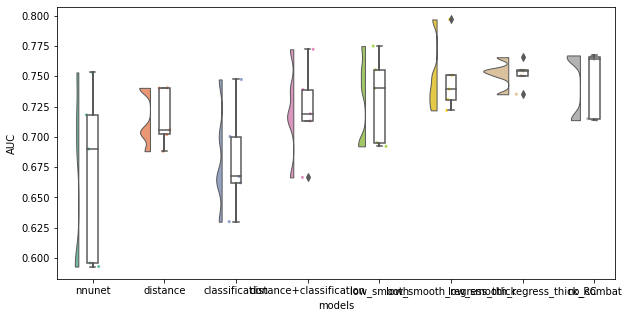

In [6]:
df = pd.DataFrame(np.vstack([aucs,n_epochs,labels]).T,columns=['AUC','n_epochs','models'],)

df['AUC'] = df['AUC'].astype(float)
df['n_epochs'] = df['n_epochs'].astype(float)

fig, ax = plt.subplots(1,1,figsize=(10,5))
pt.RainCloud(data=df, x='models',y='AUC',ax=ax)
ttests = np.zeros((len(model_paths.keys()),len(model_paths.keys())))
for m_i,model in enumerate(model_paths.keys()):
    for m2_i,model2 in enumerate(model_paths.keys()):
        ttests[m_i,m2_i] = st.ttest_rel(df['AUC'][df['models']==model],
        df['AUC'][df['models']==model2]
        )[0]

In [7]:
models

NameError: name 'models' is not defined

[[ 1.         -0.07092229]
 [-0.07092229  1.        ]]
[[ 1.         -0.14718686]
 [-0.14718686  1.        ]]
[[ 1.         -0.61414281]
 [-0.61414281  1.        ]]
[[1.         0.76441405]
 [0.76441405 1.        ]]
[[1.         0.17017151]
 [0.17017151 1.        ]]
[[ 1.        -0.6701092]
 [-0.6701092  1.       ]]
[[1.         0.51305337]
 [0.51305337 1.        ]]


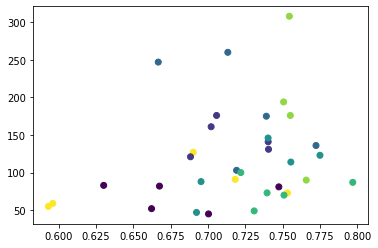

In [ ]:
df=df[df['n_epochs']>0]
models = np.unique(df['models'])
c=[]
for m in df['models']:
    c_ind = np.where(models==m)[0]
    c.append(c_ind)
plt.scatter(df['AUC'],df['n_epochs'],c=c)
for model in models:
    model_mask = df['models']==model
    print(np.corrcoef(df['AUC'][model_mask],df['n_epochs'][model_mask]))

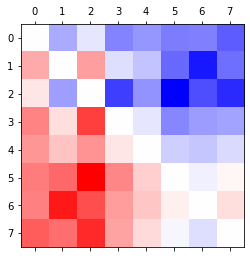

In [8]:
plt.matshow(np.nan_to_num(ttests),cmap='bwr')

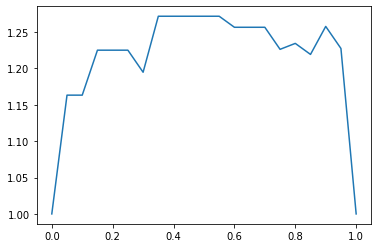

In [7]:
youden = b['sensitivity_plus']/max(b['sensitivity_plus'])+b['specificity']/max(b['specificity'])

plt.plot(b['thresholds'],youden)

In [8]:
def optimal_threshold(b):
    youden = b['sensitivity_plus']/max(b['sensitivity_plus'])+b['specificity']/max(b['specificity'])
    optimal_thresh = b['thresholds'][np.max(np.where(youden==np.max(youden)))]
    print(optimal_thresh)




In [9]:
import json

In [11]:
#sample sizes
model_paths = {'sample_fraction_0.1':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-05-29_LXRQ_subsampling_0.1/s_0',
'sample_fraction_0.2':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-05-29_LXRQ_subsampling_0.2/s_0',
'sample_fraction_0.3':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-05-29_LXRQ_subsampling_0.3/s_0',               
'sample_fraction_0.4':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-05-29_LXRQ_subsampling_0.4/s_0', 
'sample_fraction_0.6':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-05-29_LXRQ_subsampling_0.6/s_0',    
'sample_fraction_0.8':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-05-29_LXRQ_subsampling_0.8/s_0',         
'sample_fraction_1.0':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-03-01_WRZI_classification_distance/s_0',
}
aucs = []
labels= [] 
n_subs = []
n_pats = []
for model in model_paths.keys():
    
    for fold in np.arange(5):
        fname = os.path.join(model_paths[model],f'fold_0{fold}','results','roc_auc.pickle')
        with open(fname, 'rb') as handle:
            b = pickle.load(handle)
        # optimal_threshold(b)
        
        aucs.append(b['auc_plus'])
        labels.append(model)
        d_params = json.load(open(os.path.join(model_paths[model],f'fold_0{fold}','data_parameters.json')))
        n_subs.append(len(d_params['train_ids']))
        n_pat = 0
        for s in d_params['train_ids']:
            if 'FCD' in s:
                n_pat+=1
        n_pats.append(n_pat)

In [15]:
import pygam

In [55]:
#fit pygam model
import numpy as np
import GPy

def fit_gpy_regression(auc, n_subs, num_std=1):
    # Convert input arrays to numpy arrays
    auc = np.array(auc)
    n_subs = np.array(n_subs)

    # Normalize the input data
    auc_mean, auc_std = np.mean(auc), np.std(auc)
    n_subs_mean, n_subs_std = np.mean(n_subs), np.std(n_subs)
    auc_normalized = (auc - auc_mean) / auc_std
    n_subs_normalized = (n_subs - n_subs_mean) / n_subs_std

    # Reshape the data to be column vectors
    auc_normalized = auc_normalized.reshape(-1, 1)
    n_subs_normalized = n_subs_normalized.reshape(-1, 1)

    # Define the Gaussian process model
    kernel = GPy.kern.RBF(input_dim=1)
    model = GPy.models.GPRegression(n_subs_normalized, auc_normalized, kernel)

    # Optimize the model parameters
    model.optimize()

    # Create a test set with uniformly spaced values of n_subs_normalized
    n_subs_test_normalized = np.linspace(n_subs_normalized.min(), n_subs_normalized.max(), 100).reshape(-1, 1)
    auc_pred_normalized, auc_pred_var = model.predict(n_subs_test_normalized)
    auc_pred_std = np.sqrt(auc_pred_var)

    # Rescale the predicted AUC values and standard deviations to the original scale
    auc_pred = auc_pred_normalized * auc_std + auc_mean
    auc_pred_upper = auc_pred + num_std * auc_pred_std * auc_std
    auc_pred_lower = auc_pred - num_std * auc_pred_std * auc_std
    n_subs_test = n_subs_test_normalized * n_subs_std + n_subs_mean

    return auc_pred, auc_pred_upper, auc_pred_lower, n_subs_test


In [56]:
auc_pred, auc_pred_upper, auc_pred_lower, n_subs_test = fit_gpy_regression(aucs, n_subs)

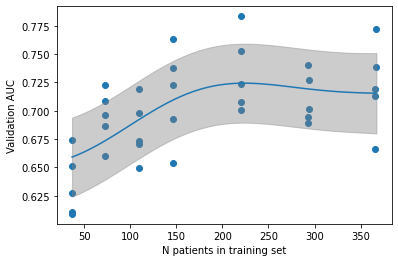

In [67]:

fig,ax= plt.subplots()
#ax.plot(n_pats,aucs)
ax.scatter(n_subs,aucs)
ax.plot(n_subs_test, auc_pred)

ax.fill_between(n_subs_test.ravel(), auc_pred_lower.ravel(),
                auc_pred_upper.ravel(), color='Grey',alpha=0.4)
ax.set_ylabel('Validation AUC')
ax.set_xlabel('N patients in training set')
fig.savefig('../figures/sample_sizes.png', dpi=250)